In [1]:
import sympy as sm
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [2]:
rr = 0.83; aa1 = 1.66; bb1 = 0.33; d1 = 0.4
aa2 = 0.05; bb2 = 0.5; d2 = 0.01

In [3]:
##Hastings to MacArthur model conversion##
r0 = rr; mC0 = d1; mP0 = d2; ##Easy ones

q0 = 1/10000; aP0 = 0.01; eP0 = 0.04 ##Random allocation

aC0 = ((aa1/bb1) * (bb2/aa2))*aP0*eP0
aC0

hC0 = q0/(bb1*aC0)
hC0

eC0 = hC0*aa1
eC0

print(aa1/bb1)
print((eC0*aC0)/q0)

hP0 = q0/(bb2*aP0*eC0)
hP0

eP0 = aa2*hP0
eP0

5.030303030303029
5.0303030303030285


0.04000000000000001

In [4]:
u0 = np.array([0.8, 0.61, 9.742, 0])
v0 = u0
v0[0] = u0[0]/q0
v0[1] = u0[1]*eC0/q0
v0[2] = u0[2]*eC0*eP0/q0
v0

array([8000.  ,  152.5 ,   97.42,    0.  ])

In [5]:
u0 = v0
u0

array([8000.  ,  152.5 ,   97.42,    0.  ])

In [6]:
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
p

(0.83,
 0.0001,
 0.02012121212121212,
 0.024999999999999998,
 0.015060240963855422,
 0.4,
 0.01,
 0.04000000000000001,
 0.01,
 0.8)

In [7]:
Xr, X0, Ex0, K, T = sm.symbols('X_r, X_0, E_x0, K, T ')
#Xr = X0*sm.exp(-Ex0/(K*T))
fx = Xr - X0*sm.exp(-Ex0/(K*T))
fx

-X_0*exp(-E_x0/(K*T)) + X_r

In [8]:
##Temperature for temperate case##
tmp = np.linspace(297.1, 298.35, 10); 
tmp[0] ##Initial temperature 
T0 = tmp[0]

In [9]:
##Intrinsic growth rate of resources
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.5), (K, 1.380649e-23), (T, T0), (Xr, r0)]) 
xr = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
frT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.5), (K, 1.380649e-23), (X0, xr[0])])
frT2 = sm.lambdify(T, frT1, 'numpy')
print(frT2(285))
print(frT2(297))
print(frT2(300))


0.3622267478039364
0.8245601125234897
1.002460458557041


In [10]:
##Carrying capacity of resources##
K0 = 1/q0
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.1), (K, 1.380649e-23), (T, T0), (Xr, K0)]) 
xK = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
fKT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.1), (K, 1.380649e-23), (X0, xK[0])])
fqT2 = (sm.lambdify(T, 1/fKT1, 'numpy'))
print(fqT2(285))
print(fqT2(297))
print(fqT2(300))

0.00011803736748884802
0.0001001315995883061
9.629465205372942e-05


In [11]:
##Attack rate of consumers

fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.7), (K, 1.380649e-23), (T, T0), (Xr, aC0)]) 
xaC = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
faCT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.7), (K, 1.380649e-23), (X0, xaC[0])])
faCT2 = sm.lambdify(T, faCT1, 'numpy')
print(faCT2(285))
print(faCT2(297))
print(faCT2(300))

0.006302567903881089
0.019936827966624947
0.026208306662287264


In [12]:
##Efficiency of consumers##

fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.6), (K, 1.380649e-23), (T, T0), (Xr, eC0)]) 
xeC = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
feCT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.6), (K, 1.380649e-23), (X0, xeC[0])])
feCT2 = sm.lambdify(T, feCT1, 'numpy')
print(feCT2(285))
print(feCT2(297))
print(feCT2(305))

0.009243212080269991
0.024803506654931466
0.04587393293923369


In [13]:
##Handling cost - consumers##

fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.6), (K, 1.380649e-23), (T, T0), (Xr, hC0)]) 
xhC = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
fhCT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.6), (K, 1.380649e-23), (X0, xhC[0])])
fhCT2 = sm.lambdify(T, fhCT1, 'numpy')
print(fhCT2(285))
print(fhCT2(297))
print(fhCT2(300))

0.005568200048355412
0.014941871478874366
0.01888943252870542


In [14]:
#Intrinsic mortality rate of consumers##

fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.6), (K, 1.380649e-23), (T, T0), (Xr, mC0)]) 
xmC = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
fmCT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.6), (K, 1.380649e-23), (X0, xmC[0])])
fmCT2 = sm.lambdify(T, fmCT1, 'numpy')
print(fmCT2(285))
print(fmCT2(297))
print(fmCT2(300))

0.14789139328432
0.39685610647890385
0.5017033279624168


In [15]:
##Attack rate of predators
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (T, T0), (Xr, aP0)]) 
xaP = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
faPT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (X0, xaP[0])])
faPT2 = sm.lambdify(T, faPT1, 'numpy')
print(faPT2(285))
print(faPT2(297))
print(faPT2(300))

0.005151360451183568
0.00994753289442055
0.011630310970406295


In [16]:
##Efficiency of predators
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (T, T0), (Xr, eP0)]) 
xeP = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
fePT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (X0, xeP[0])])
fePT2 = sm.lambdify(T, fePT1, 'numpy')
print(fePT2(285))
print(fePT2(297))
print(fePT2(300))

0.02060544180473424
0.03979013157768214
0.0465212438816251


In [17]:
##Intrisic mortality rate of predators#
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (T, T0), (Xr, mP0)]) 
xmP = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
fmPT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (X0, xmP[0])])
fmPT2 = sm.lambdify(T, fmPT1, 'numpy')
print(fmPT2(285))
print(fmPT2(297))
print(fmPT2(300))

0.005151360451183568
0.00994753289442055
0.011630310970406295


In [18]:
##handling cost - Predators #
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (T, T0), (Xr, hP0)]) 
xhP = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
fhPT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.4), (K, 1.380649e-23), (X0, xhP[0])])
fhPT2 = sm.lambdify(T, fhPT1, 'numpy')
print(fhPT2(285))
print(fhPT2(297))
print(fhPT2(300))

0.4121088360946856
0.7958026315536444
0.930424877632504


In [19]:
def RCP_temp (t, u, ct, mt):

    Tt= ct + mt*t
    
    r1 = np.around(frT2(Tt),6); q1 = np.around(fqT2(Tt),10)
    aC1 = np.around(faCT2(Tt),6); eC1 = np.around(feCT2(Tt),6); hC1 = np.around(fhCT2(Tt),6); mC1 = np.around(fmCT2(Tt),6); 
    aP1 = np.around(faPT2(Tt),6); eP1 = np.around(fePT2(Tt),6); hP1 = np.around(fhPT2(Tt),6); mP1 = np.around(fmPT2(Tt),6);
  
    
    p0 = (ct, Tt, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1)
    #print(p0)
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]
    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    
    
    du = du.reshape(4,)
    
    return(du)

In [20]:
tmp
u0

array([8000.  ,  152.5 ,   97.42,    0.  ])

In [21]:
tdif = tmp[len(tmp)-1] - tmp[0]

In [22]:
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*10)
    
tr = tdif/tend;

p = (tmp[0], tr)
print(p)
start_time = timeit.default_timer()
sol1 = solve_ivp (RCP_temp, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-12, atol=1e-12)
print(timeit.default_timer() - start_time)

(297.1, 0.000125)
2994.395545500098


In [23]:
ssv0 = sol1.y[:,10:]
tm = ssv0[3]; R0 = ssv0[0]; C0 = ssv0[1]; P0 = ssv0[2]


<IPython.core.display.Javascript object>


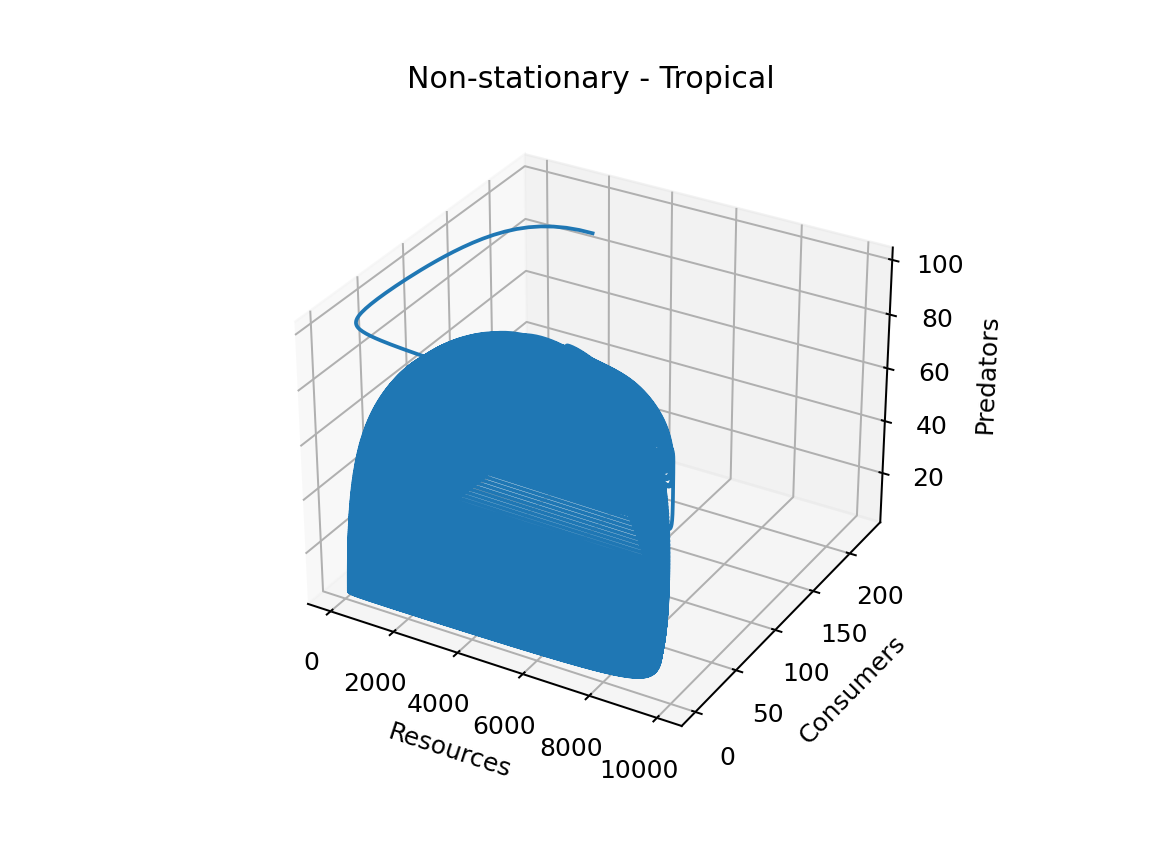

Text(0.5, 0.92, 'Non-stationary - Tropical')

In [50]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R0, C0, P0)
ax.set_xlabel("Resources") ; ax.set_ylabel("Consumers"); ax.set_zlabel("Predators");
ax.set_title("Non-stationary - Tropical")


In [25]:
v0
u0

array([8000.  ,  152.5 ,   97.42,    0.  ])

<IPython.core.display.Javascript object>


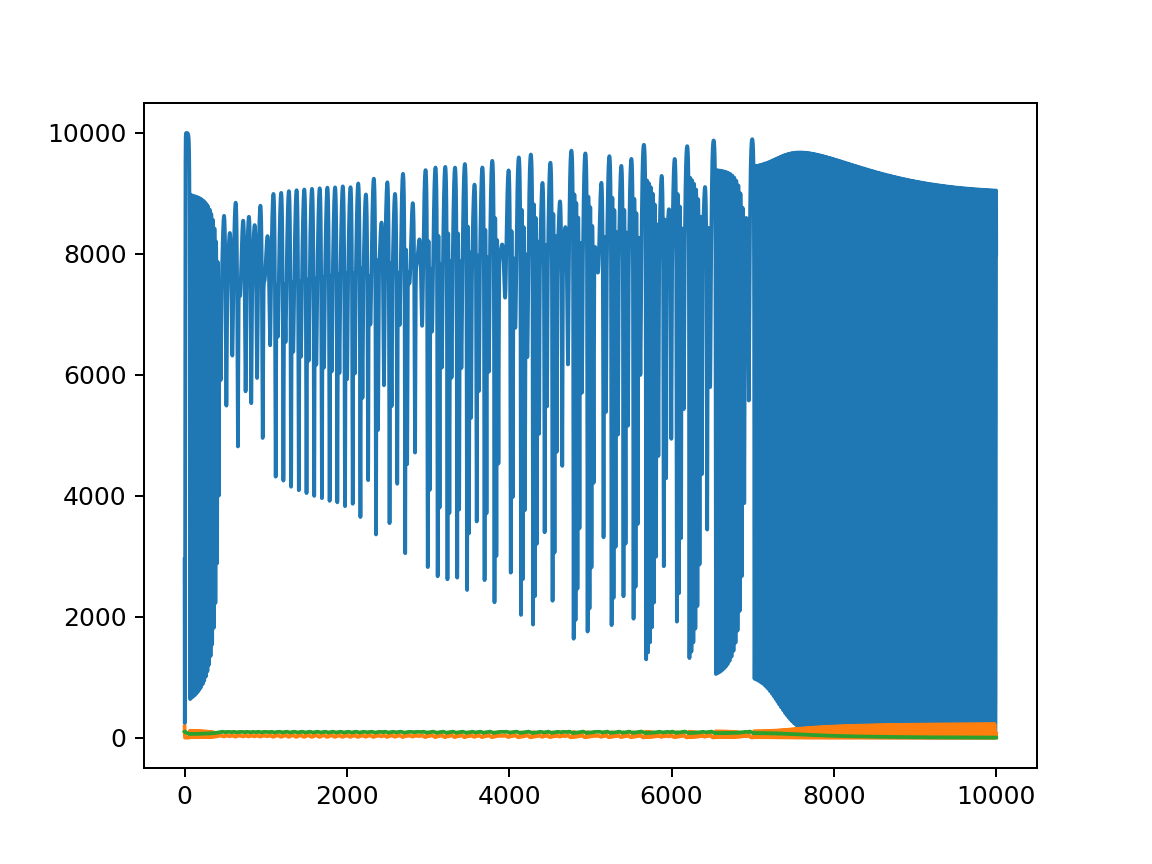

In [80]:
%matplotlib notebook
plt.plot(tm, R0)
plt.plot(tm, C0)
plt.plot(tm, P0)

In [27]:
np.shape(sol1.y);
df = pd.DataFrame(np.transpose(sol1.y))
df.to_csv('non_stationary_tropical.csv')

In [28]:
df.head(n=20)

,0,1,2,3
0,8000.000000,152.500000,97.420000,0.000000
1,7425.396369,157.571894,97.592409,0.100001
2,6867.644238,162.485539,97.768949,0.200002
3,6324.408844,167.169958,97.949371,0.300003
4,5794.447217,171.542341,98.133386,0.400004
5,5277.555526,175.507842,98.320668,0.500005
6,4774.533501,178.960273,98.510844,0.600006
7,4287.139002,181.783947,98.703493,0.700007
8,3818.006968,183.857364,98.898135,0.800008
9,3370.501640,185.059017,99.094232,0.900009


In [29]:
thrsh = 7800 ##for poincare section in C,P plane

dfsol = sol1.y
np.shape(dfsol)
np.arange(np.shape(dfsol)[1])

array([    0,     1,     2, ..., 99997, 99998, 99999])

In [30]:
import scipy.interpolate

up_entr = np.zeros((1,4))
dw_entr = np.zeros((1,4))

for i in (np.arange(np.shape(dfsol)[1])-1):
    
    x1 = dfsol[0][i] - thrsh; x2 = dfsol[0][i+1] - thrsh
    
    if ((x1 > 0) and (x1 * x2) < 0):
        
        y_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[1][i], dfsol[1][i+1]])
        ypcr = y_interp(thrsh)
        
        z_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[2][i], dfsol[2][i+1]])
        zpcr = z_interp(thrsh)
        
        t_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[3][i], dfsol[3][i+1]])
        tpcr = t_interp(thrsh)
        
        Tmp= tmp[0] + tr*tpcr
        
        up_entr1 = np.array([ypcr, zpcr, tpcr, Tmp]).reshape(1,4)
        up_entr = np.concatenate([up_entr, up_entr1], axis = 0)
       
        
        
    if ((x1 < 0) and (x1 * x2) < 0):
        
        y_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[1][i], dfsol[1][i+1]])
        ypcr = y_interp(thrsh)
        
        z_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[2][i], dfsol[2][i+1]])
        zpcr = z_interp(thrsh)
        
        t_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[3][i], dfsol[3][i+1]])
        tpcr = t_interp(thrsh)
        
        Tmp= tmp[0] + tr*tpcr
        
        dw_entr1 = np.array([ypcr, zpcr, tpcr, Tmp]).reshape(1,4)
        dw_entr = np.concatenate([dw_entr, dw_entr1], axis = 0)
        
        
        
    

In [31]:
updf = np.delete(up_entr, [0,1], axis=0)
print(np.shape(updf))
cons = updf[:,0]
pred = updf[:,1]
temp = updf[:,3]

(287, 4)


<IPython.core.display.Javascript object>


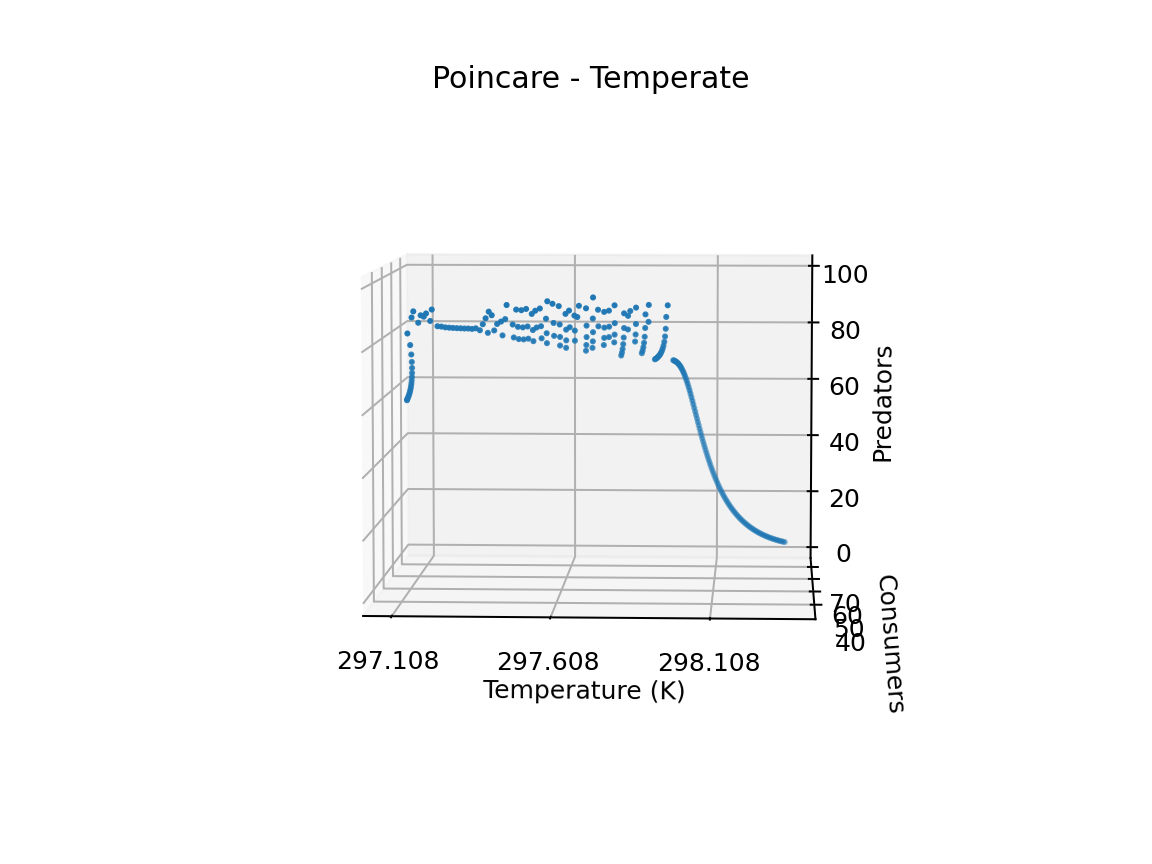

Text(0.5, 0.92, 'Poincare - Temperate')

In [81]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.scatter(temp, cons, pred, s = 2)
ax.set_xticks(np.arange(min(temp), max(temp)+0.1, 0.5))
ax.set_xlabel("Temperature (K)") ; ax.set_ylabel("Consumers"); ax.set_zlabel("Predators");
ax.set_title("Poincare - Temperate")

286


<IPython.core.display.Javascript object>


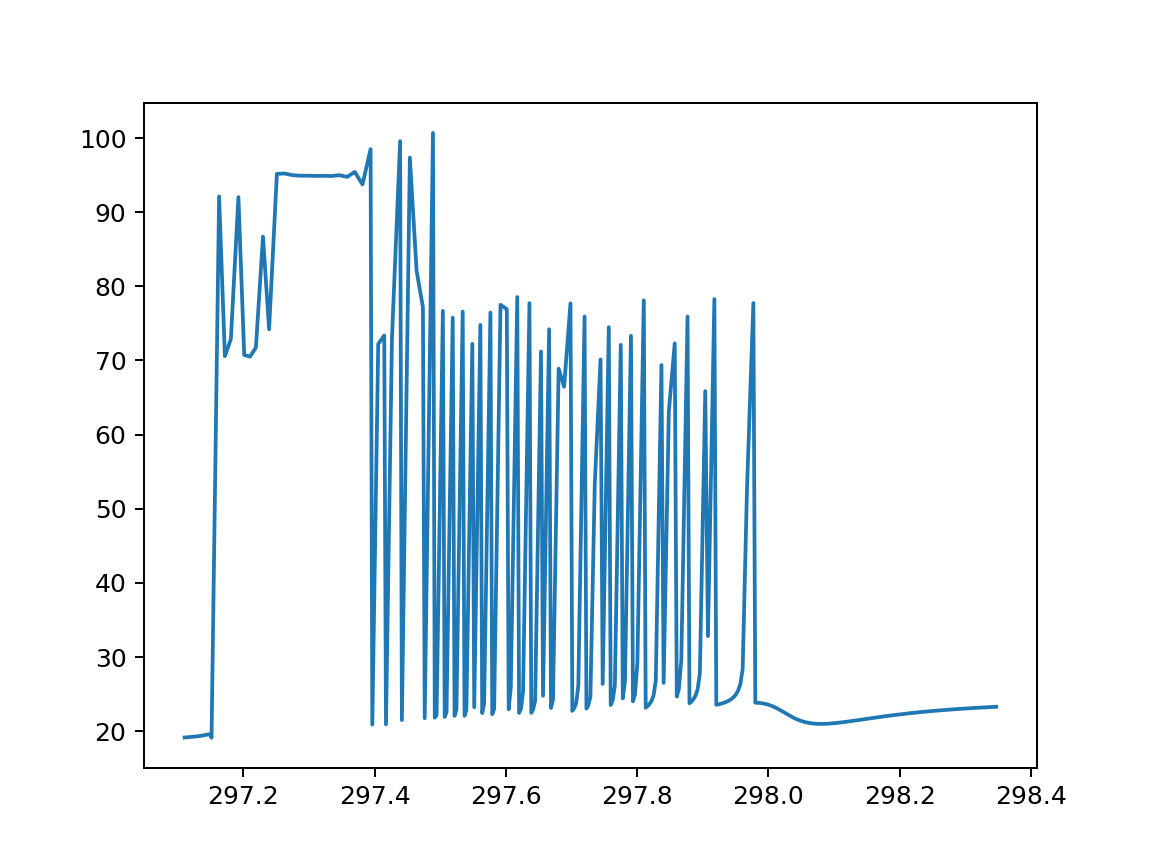

In [33]:
%matplotlib notebook
simuT = updf[:,2]
simuTdif = np.diff(simuT)
print(len(simuTdif))
len(temp[1:])
plt.plot(temp[1:], simuTdif)

<IPython.core.display.Javascript object>


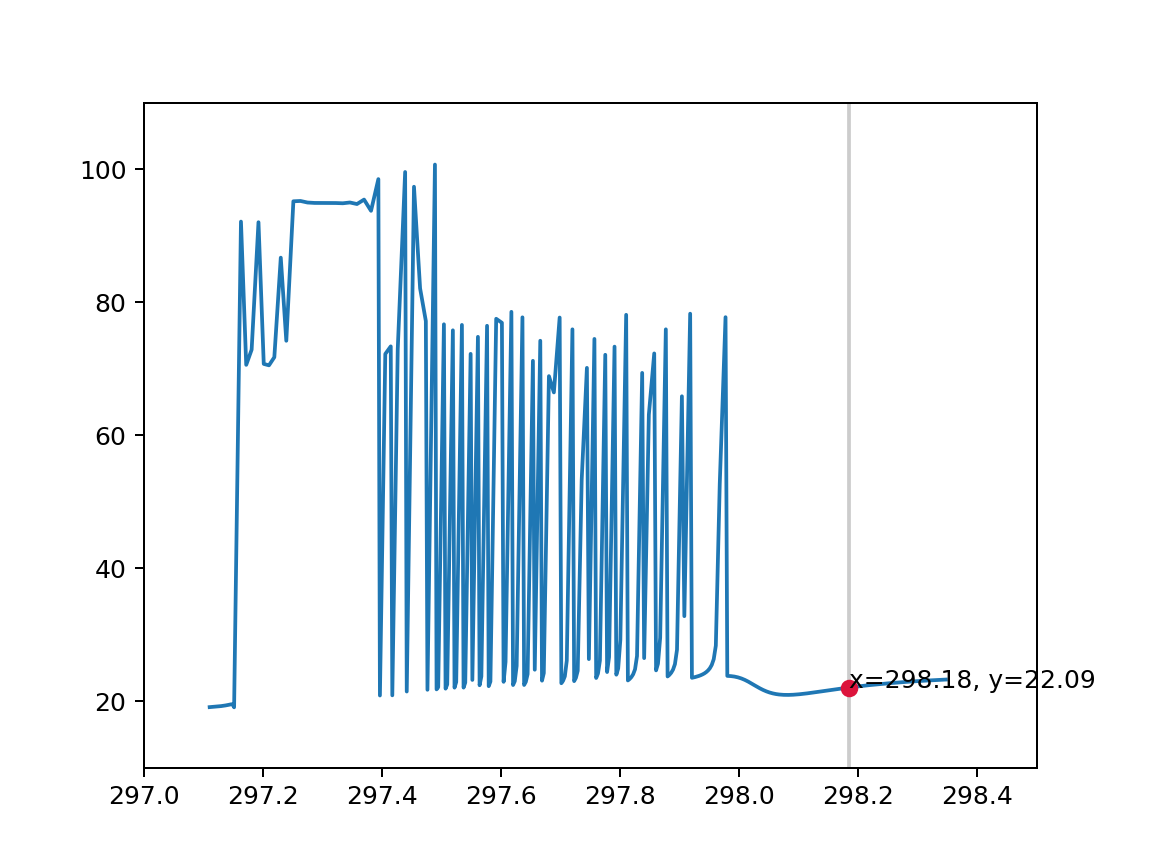

In [82]:
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import numpy as np

class SnaptoCursor(object):
    def __init__(self, ax, x, y):
        self.ax = ax
        self.ly = ax.axvline(color='k', alpha=0.2)  # the vert line
        self.marker, = ax.plot([0],[0], marker="o", color="crimson", zorder=3) 
        self.x = x
        self.y = y
        self.txt = ax.text(0.7, 0.9, '')

    def mouse_move(self, event):
        if not event.inaxes: return
        x, y = event.xdata, event.ydata
        indx = np.searchsorted(self.x, [x])[0]
        x = self.x[indx]
        y = self.y[indx]
        self.ly.set_xdata(x)
        self.marker.set_data([x],[y])
        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        self.txt.set_position((x,y))
        self.ax.figure.canvas.draw_idle()

fig, ax = plt.subplots()

#cursor = Cursor(ax)
cursor = SnaptoCursor(ax, temp[1:], simuTdif)
cid =  plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(temp[1:], simuTdif)
plt.axis([297, 298.5, 10, 110])
plt.show()

In [52]:
import scipy.signal as sig
    
Pdf = np.array([tm, P0])
Pdf = pd.DataFrame(np.transpose(Pdf))

Pdf.columns = ['temp', 'sv']
lows, _ = sig.find_peaks(-Pdf['sv']) ##get the minima info
lws = Pdf.sv.values[lows]


array([60.09480694, 60.47551965, 60.91568937, 61.39463286, 61.91643297,
       62.48780849, 63.11734403, 63.81388781, 64.58925349, 65.4598137 ,
       66.44551733, 67.57127399, 68.87198557, 70.39732284, 72.2157145 ,
       74.42613058, 77.18096314, 80.7063031 , 85.30591169, 90.23406008,
       92.43711319, 88.32332454, 90.99458213, 90.4954282 , 91.63314476,
       88.92345115, 93.01454641, 86.99931275, 86.84649228, 86.56244348,
       86.42322424, 86.32061101, 86.22260015, 86.15345839, 86.05978691,
       86.03663569, 85.87788146, 91.96736398, 86.07859455, 92.23231048,
       85.35295713, 91.29883241, 87.52028995, 84.38748674, 90.00381873,
       92.0099323 , 85.2246313 , 91.13104713, 87.5483823 , 83.386243  ,
       88.58912839, 89.2549474 , 94.30151179, 82.59092528, 87.42385748,
       81.97796468, 86.53321888, 92.922288  , 81.83700041, 86.30335018,
       92.6102603 , 82.06666198, 86.59617886, 93.00939937, 81.15252576,
       85.26459393, 91.14329705, 86.07210443, 92.25647698, 82.14

<IPython.core.display.Javascript object>


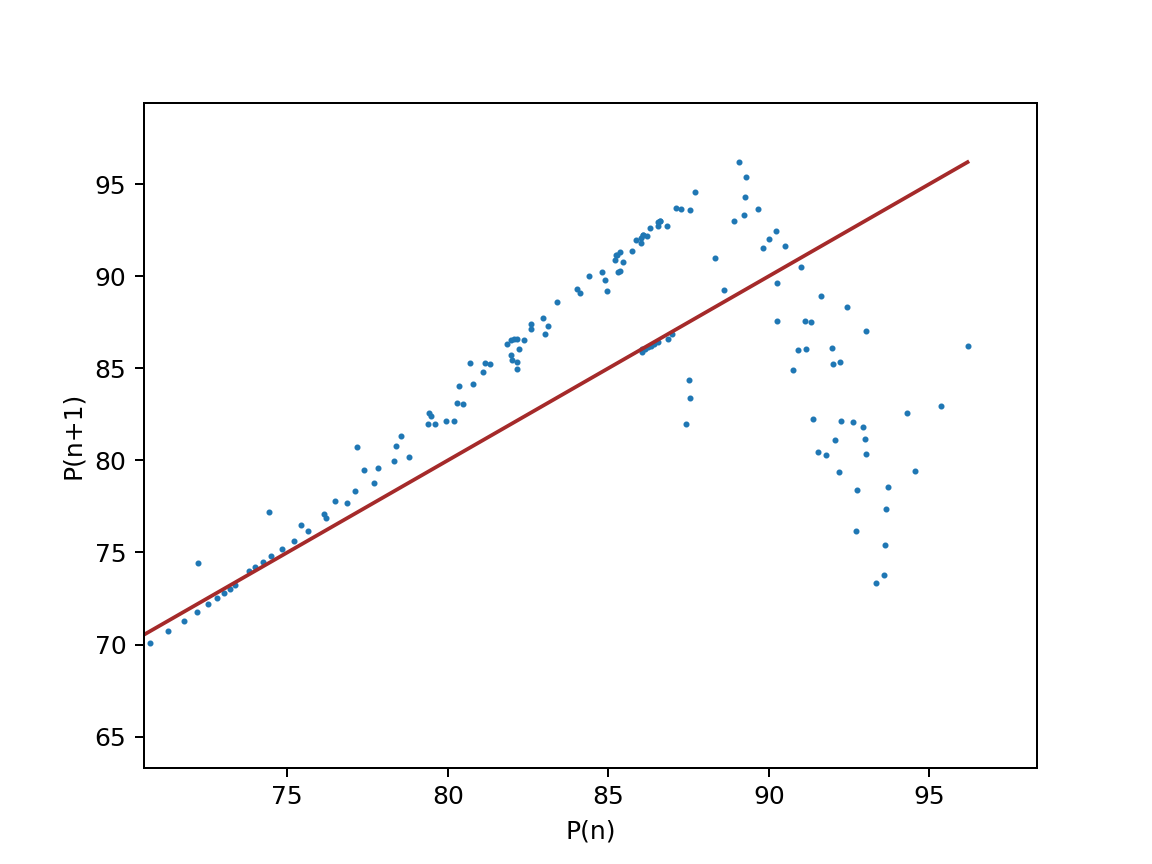

In [87]:
%matplotlib notebook
lws_n1 = lws[1:]
lws_n0 = lws[:-1]
plt.scatter(lws_n0, lws_n1, s=2)
plt.xlabel("P(n)"); plt.ylabel("P(n+1)")

#Add 1:1 line
x_range = [np.min(lws_n0), np.max(lws_n0)]
y_xr = np.linspace(x_range[0], x_range[1], 100)
x_xr = y_xr
plt.plot(x_xr, y_xr, c = 'brown')

In [70]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [35]:
##Intrinsic growth rate of resources
fx1 = fx.subs([(Ex0, 1.60218e-19 * 0.5), (K, 1.380649e-23), (T, T0), (Xr, r0)]) 
xr = sm.solve(fx1, X0)

fxT = X0*sm.exp(-Ex0/(K*T))
frT1 = fxT.subs([(Ex0, 1.60218e-19 * 0.5), (K, 1.380649e-23), (X0, xr[0])])
frT2 = sm.lambdify(T, frT1, 'numpy')
frT2(tmp)

array([0.83      , 0.83760884, 0.84528023, 0.85301461, 0.86081245,
       0.8686742 , 0.87660032, 0.88459127, 0.89264752, 0.90076954])

In [36]:
upcsv = pd.DataFrame(np.transpose(up_entr))
upcsv.to_csv('non_stationary_tropical_poincareCP_up.csv')

In [37]:
dwcsv = pd.DataFrame(np.transpose(dw_entr))
dwcsv.to_csv('non_stationary_tropical_poincareCP_dw.csv')

In [38]:
y_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[1][i], dfsol[1][i+1]])
ypcr = y_interp(thrsh)
        
z_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[2][i], dfsol[2][i+1]])
zpcr = z_interp(thrsh)
        
t_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[3][i], dfsol[3][i+1]])
tpcr = t_interp(thrsh)
        
Tmp= tmp[0] + tr*tpcr

ValueError: A value in x_new is below the interpolation range.

In [ ]:
import scipy.interpolate
z_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[2][i], dfsol[2][i+1]])
zpcr = z_interp(thrsh)
        
t_interp = scipy.interpolate.interp1d([ dfsol[0][i],  dfsol[0][i+1]], [dfsol[3][i], dfsol[3][i+1]])
tpcr = t_interp(thrsh)